In [ ]:
pip install numpy Pillow #install required library

# Image Enhancement Point Processing (1)

## 1.1. Grey Level Transformation

### Linear
Linear transformations include **identity transformation** and __negative transformation__. In identity transformation, the input image is the same as the output image. For an image with intensity values ranging from 0 to 255, the transformation is:

$$
p_{\text{negative}} = L - 1 - r = 256 - 1 - r = 255 - p
$$

where $L$ is the largest gray level in an image. The negative transformation is suited for enhancing white or gray details embedded in dark areas of an image, for example, analyzing breast tissue in a digital mammogram.

In [216]:
import numpy as np
from PIL import Image

img = Image.open('durian.jpg')

img_array = np.array(img)
negative_img_array = 255 - img_array
negative_img = Image.fromarray(negative_img_array)

negative_img.show()

In [204]:
negative_img_array

array([[122, 112,  96, ...,  88,  92,  96],
       [127, 116,  98, ...,  86,  89,  93],
       [132, 121, 102, ...,  84,  87,  90],
       ...,
       [189, 190, 191, ..., 176, 180, 183],
       [207, 207, 207, ..., 176, 181, 186],
       [218, 218, 217, ..., 176, 184, 190]], dtype=uint8)

In [202]:
import numpy as np
from PIL import Image

img = Image.open('durian.jpg').convert('L')

img_array = np.array(img)
negative_img_array = 255 - img_array
negative_img = Image.fromarray(negative_img_array)

negative_img.show()

In [217]:
negative_img_array

array([[[135, 108, 159],
        [126,  97, 151],
        [111,  80, 137],
        ...,
        [124,  60, 138],
        [128,  64, 142],
        [132,  68, 146]],

       [[140, 113, 164],
        [130, 101, 155],
        [113,  82, 139],
        ...,
        [122,  58, 136],
        [125,  61, 139],
        [129,  65, 143]],

       [[145, 119, 167],
        [135, 107, 158],
        [117,  86, 143],
        ...,
        [120,  56, 134],
        [123,  59, 137],
        [126,  62, 140]],

       ...,

       [[183, 189, 201],
        [184, 190, 202],
        [185, 191, 203],
        ...,
        [193, 163, 201],
        [198, 166, 203],
        [201, 169, 206]],

       [[201, 208, 218],
        [201, 208, 218],
        [201, 208, 218],
        ...,
        [194, 162, 201],
        [199, 167, 206],
        [204, 172, 209]],

       [[212, 219, 229],
        [212, 219, 229],
        [211, 218, 228],
        ...,
        [194, 162, 201],
        [202, 170, 209],
        [208, 176, 213]]

### Logarithmic
The **logarithmic** transformation is a nonlinear gray-level transformation used to expand the values of dark pixels and compress those of bright pixels. It is particularly useful for enhancing details in darker areas of an image, as it maps a narrow range of low gray levels to a much broader output range, enhancing contrast.

The logarithmic transformation formula is:

$$
s = c \cdot \log(1 + r)
$$

where:
- $s$: output pixel intensity
- $r$: input pixel intensity
- $c$: a constant, typically set to $c = \frac{255}{\log(256)}$ to ensure the output values range from 0 to 255.

In logarithmic transformation, low-intensity values are amplified, making this transformation effective for images that are dark overall, such as underexposed photographs or medical images with low contrast.



In [224]:
import numpy as np
c = 30
img_array = np.array(img)
log_img_array = c * np.log1p(img_array)
log_img = Image.fromarray(np.uint8(log_img_array))
log_img.show()

In [226]:
import numpy as np
c = 255 / np.log(256)
img_array = np.array(img)
log_img_array = c * np.log1p(img_array)
log_img = Image.fromarray(np.uint8(log_img_array))
log_img.show()

### Power Law
The **power law** (or gamma correction) is another nonlinear transformation that adjusts the intensity values according to a power relationship. This transformation can be controlled by a parameter $\gamma$, allowing for a variety of enhancements by compressing or expanding the dynamic range.

The formula for power law transformation is:

$$
s = c \cdot r^{\gamma}
$$

where:
- $s$: output pixel intensity
- $r$: input pixel intensity
- $c$: constant, usually set to normalize the output
- $\gamma$: exponent that determines the curve’s shape

- **For $\gamma < 1$**: Increases the intensity of darker pixels, which is helpful for dark images.
- **For $\gamma > 1$**: Compresses intensity in darker regions, enhancing contrast in lighter areas, useful for bright images.

Power law transformations are common in display settings and are useful for gamma correction to account for the nonlinear response of display systems.


In [229]:
gamma = 1.5
power_img = img.point(lambda p: 255 * (p / 255) ** gamma)
power_img.show()

In [228]:
gamma = 0.5
power_img = img.point(lambda p: 255 * (p / 255) ** gamma)
power_img.show()

In [188]:
gamma_corrected = np.array(255*(img_array / 255) ** gamma, dtype = 'uint8') 
power_img = Image.fromarray(np.uint8(gamma_corrected))
power_img.show()

## 1.2. Thresholding
Grayscale Threshold Transform converts a grayscale image into a black and white binary image. The user specifies a value that acts as a dividing line. If the gray value of a pixel is smaller than the dividing, the intensity of the pixel is set to 0, otherwise it’s set to 255. The value of the dividing line is called the threshold. The grayscale threshold transform is often referred to as thresholding, or binarization. 

Thresholding separates pixels into two groups based on a threshold value $\ T $ If $\ p > T $\, a pixel is set to a high value (e.g., 255), and if $\ p \leq T $\, it’s set to a low value (e.g., 0):
$$
p_{\text{threshold}} = 
\begin{cases}
255 & \text{if } p > T \\
0 & \text{if } p \leq T
\end{cases}
$$

In [236]:
from PIL import Image

img = Image.open('durian.jpg').convert('L')

threshold_value = 127
thresholded_img = img.point(lambda p: 255 if p > threshold_value else 0, mode='1')

thresholded_img.show()

## 1.3. Piecewise Linear (Gray-level Slicing)

These functions are not entirely linear in nature, but they are linear between certain x-intervals. One of the most commonly used piecewise-linear transformation functions is **contrast stretching**. Contrast stretching is a process that expands the range of intensity levels in an image so that it spans the full intensity of the display or camera. Contrast can be defined as:

$$
\text{Contrast} = \frac{I_{max} - I_{min}}{I_{max} + I_{min}}
$$

Where:
- $\ I_{max}$ : Maximum intensity value in the image.
- $\ I_{min}$ : Minimum intensity value in the image.

With the parameters $(r_1, s_1)$ and $(r_2, s_2)$, this function adjusts the intensity levels by decreasing the intensity of dark pixels and increasing the intensity of light pixels, resulting in a broader contrast range.

- **If** $\ r_1 = s_1 = 0 $ and $\ r_2 = s_2 = L-1 $, the function reduces to a straight line, giving no contrast effect.
- **Monotonicity**: The function is monotonically increasing, which preserves the order of intensity levels among pixels.

The graph below (not included here) would show the characteristic shape of the contrast stretching function, where the curve flattens near the low and high ends of intensity but steepens in the middle.


In [2]:
import numpy as np 
from PIL import Image
  
# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 

img = Image.open('durian.jpg')
  
# Define parameters. 
r1 = 70
s1 = 0
r2 = 140
s2 = 255
  
# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal) 
  
# Apply contrast stretching. 
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2) 

power_img = Image.fromarray(np.uint8(contrast_stretched))
power_img.show()

## 1.4. Bit Plane Slicing

Analyze the individual bits in the pixel values, where each pixel is represented by a binary number, commonly using 8 bits for grayscale images or 24 bits for color images.

The process of **bit-plane slicing** involves separating and displaying each bit of the pixel values as a separate image. It creates a set of binary images, each corresponding to a single bit of the original pixel values. The most significant bit (MSB) is the leftmost bit, representing the highest order bit; the least significant bit (LSB) is the rightmost bit, representing the lowest order bit.


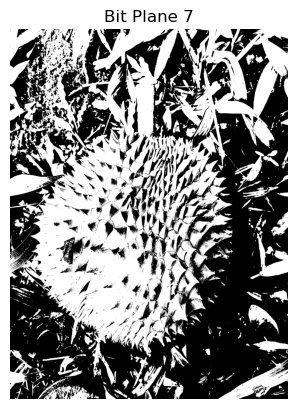

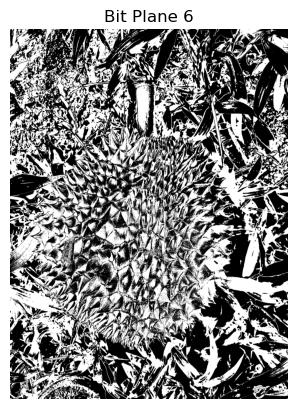

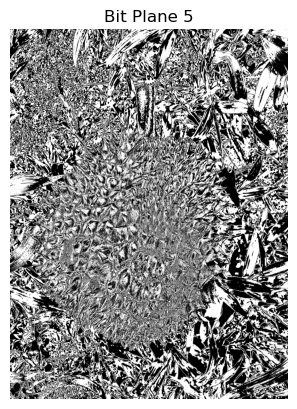

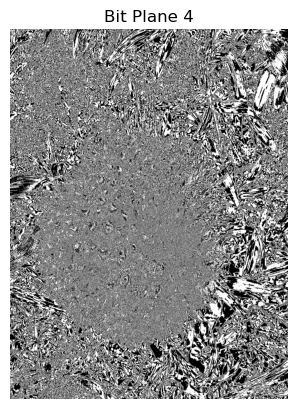

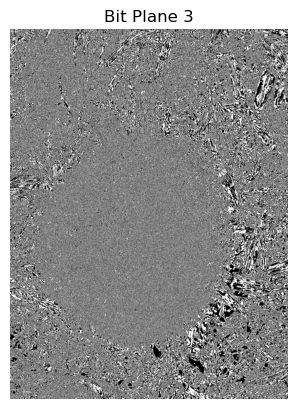

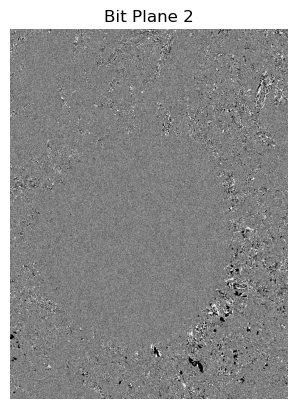

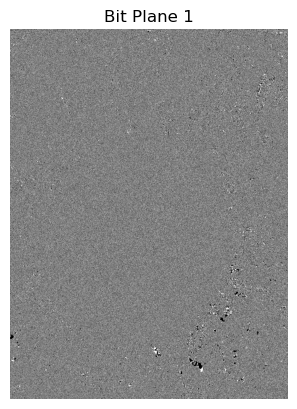

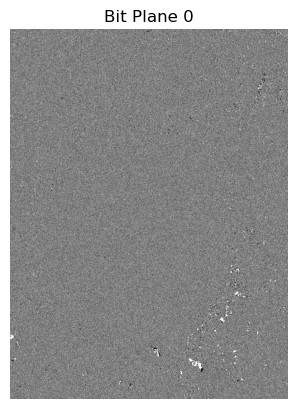

In [55]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Function to convert uint8 image to bitstream array
def int2bitarray(img):
    arr = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            arr.append(np.binary_repr(img[i][j], width=8))
    return arr

# Read image and convert to grayscale if needed
img = Image.open('durian.jpg').convert('L')  # Convert to grayscale
img_arr = np.array(img)

# Convert image to bitstream
arr = int2bitarray(img_arr)

# Initialize a 3D array to store bit planes
bit_planes = np.zeros((img_arr.shape[0], img_arr.shape[1], 8), dtype=int)

# Create bit planes
for k in range(8):
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            bit_planes[i, j, k] = int(arr[i * img_arr.shape[1] + j][k])

# Save and display bit planes
for k in range(8):
    plane = bit_planes[:, :, k] * 255  # Scale to 255 for display
    bit_plane_image = Image.fromarray(plane.astype(np.uint8))
    
    # Save the image
    # bit_plane_image.save(f'Bitplane{7-k}.png')
    
    # Display the image using matplotlib
    plt.imshow(plane, cmap='gray')
    plt.title(f'Bit Plane {7-k}')
    plt.axis('off')  # Hide axes
    plt.show()

# Image Enhancement Histogram Equalization (2)

## 2.1. Histogram Equalization

This technique redistributes pixel intensities to create a uniform distribution across the available range, enhancing contrast and dynamic range, which aids in feature extraction and object detection. The steps involved are:

1. **Calculate the Histogram:**
   $$ 
   H(k) = \text{Number of pixels with intensity } k 
   $$
   - Count the frequency of each intensity level in the image, providing a foundation for understanding the distribution of pixel values.

2. **Calculate the Cumulative Distribution Function (CDF):**
   $$ 
   C(k) = \sum_{j=0}^{k} H(j) 
   $$
   - The CDF aggregates the histogram values, representing the cumulative frequency of pixel intensities up to a certain level, helping to visualize the distribution's overall trend.

3. **Find Minimum CDF:**
   $$ 
   C_{\text{min}} = \min(C(k)) 
   $$
   - Identifying the minimum CDF value is crucial for normalizing the histogram, ensuring that the subsequent transformation does not introduce artifacts.

4. **Normalize the CDF:**
   $$ 
   C_{\text{normalized}}(k) = \frac{C(k) - C_{\text{min}}}{N - 1} 
   $$
   
   - Release the CDF to a range of 0 to 1, where \( N \) is the total number of pixels in the image, allowing for consistent intensity mapping across different images.

6. **Equalization Mapping:**
   $$ 
   E(k) = \left\lfloor (L - 1) \cdot C_{\text{normalized}}(k) \right\rfloor 
   $$
   - The equalization mapping function transforms the original intensity levels to new values, distributing pixel intensities more uniformly across the available intensity range, thereby enhancing the image's contrast.

Histogram equalization is applied in various fields, including medical imaging (e.g., X-rays), remote sensing (satellite images), computer vision (object detection), photography, and historical image restoration.


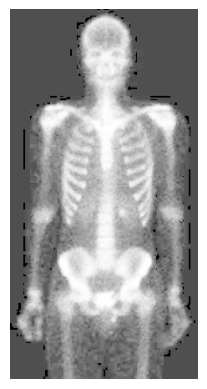

In [149]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

def histogram_equalization(image_array):
    # Calculate histogram
    histogram, _ = np.histogram(image_array.flatten(), bins=256, range=(0, 256))
    
    # Calculate cumulative distribution function (CDF)
    cdf = histogram.cumsum()
    
    # Mask zero values and normalize
    cdf_masked = np.ma.masked_equal(cdf, 0)
    cdf_masked = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
    cdf = np.ma.filled(cdf_masked, 0).astype('uint8')

    # Map the old pixel values to equalized values
    equalized_image = cdf[image_array]
    
    return equalized_image

def histogram_equalization2(image):
    """Perform histogram equalization on the image."""
    hist = calculate_histogram(image)
    cdf = hist.cumsum()  # Cumulative distribution function
    cdf_normalized = cdf * hist.max() / cdf.max()  # Normalize CDF
    cdf_mapped = np.floor(255 * (cdf - cdf.min()) / (cdf.max() - cdf.min())).astype(np.uint8)

    equalized_image = cdf_mapped[image]
    return equalized_image
    
# Load image
img = Image.open('greyscale.jpg').convert('L')  # Convert to greyscale
img_array = np.array(img, dtype=np.uint8)  # Ensure type is uint8

# Perform histogram equalization
equalized_img = histogram_equalization(img_array)

    # Display the equalized image
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

In [151]:
equalized_img

array([[79, 79, 79, ..., 79, 79, 79],
       [79, 79, 79, ..., 79, 79, 79],
       [79, 79, 79, ..., 79, 79, 79],
       ...,
       [79, 79, 79, ..., 79, 79, 79],
       [79, 79, 79, ..., 79, 79, 79],
       [79, 79, 79, ..., 79, 79, 79]], dtype=uint8)

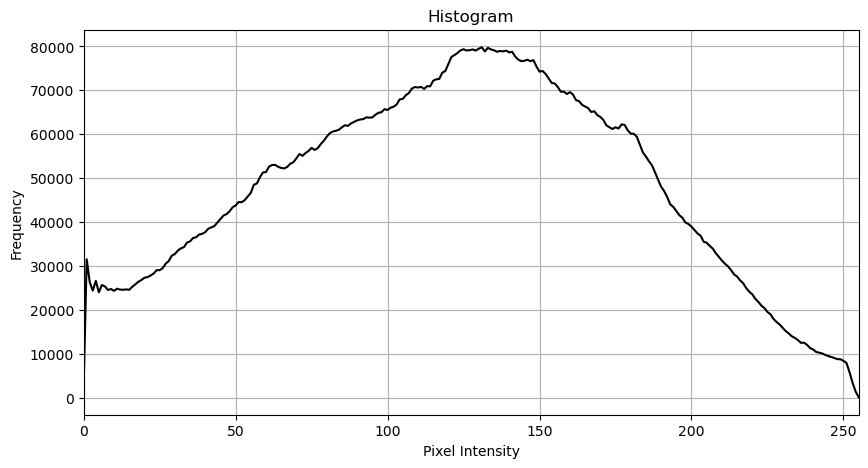

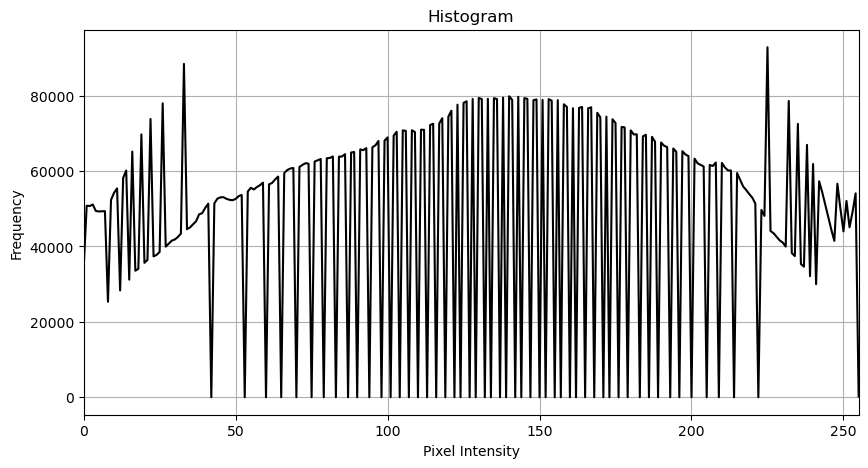

In [129]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(image_array):
    # Calculate histogram
    histogram, bins = np.histogram(image_array.ravel(), bins=256, range=(0, 256))
    
    # Plot the histogram
    plt.figure(figsize=(10, 5))
    plt.plot(bins[:-1], histogram, color='black')  # Plot histogram
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])  # Set x-axis limits to 0-255
    plt.grid()
    plt.show()

# Load image
img = Image.open('durian.jpg').convert('L')  # Convert to greyscale
img_array = np.array(img, dtype=np.uint8)  # Ensure type is uint8

# Perform histogram equalization
equalized_img = histogram_equalization(img_array)

plot_histogram(img_array)
plot_histogram(equalized_img)

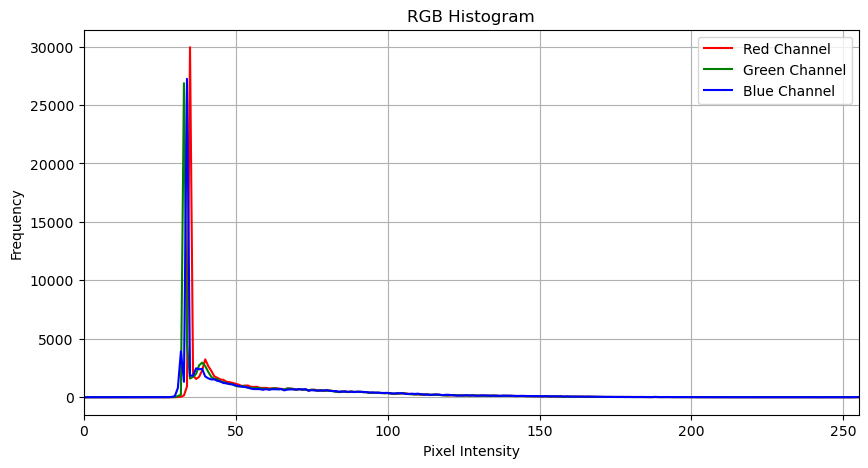

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_rgb_histogram(img_array):
    # Check if the image is RGB
    if img_array.ndim != 3 or img_array.shape[2] != 3:
        print("Error: The image is not in RGB format.")
        return
    
    # Plot histogram for each channel
    colors = ('red', 'green', 'blue')
    plt.figure(figsize=(10, 5))

    for i, color in enumerate(colors):
        # Calculate histogram
        histogram, bins = np.histogram(img_array[:, :, i], bins=256, range=(0, 256))
        # Plot the histogram for the current channel
        plt.plot(bins[:-1], histogram, color=color, label=f'{color.capitalize()} Channel')
    
    plt.title('RGB Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])  # Set x-axis limits to 0-255
    plt.legend()
    plt.grid()
    plt.show()

# Load the image outside the function
image_path = 'greyscale.jpg'  # Replace with your RGB image path

img = Image.open(image_path)
img_array = np.array(img)  # Convert image to numpy array

# Call the function with the image array
plot_rgb_histogram(img_array)

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_image(filename):
    """Load an image and convert it to grayscale."""
    img = Image.open(filename).convert('L')  # Convert to grayscale
    return np.array(img)

def calculate_histogram(image):
    """Calculate the histogram of the image."""
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    return hist

def histogram_equalization(image):
    """Perform histogram equalization on the image."""
    hist = calculate_histogram(image)
    cdf = hist.cumsum()  # Cumulative distribution function
    cdf_normalized = cdf * hist.max() / cdf.max()  # Normalize CDF
    cdf_mapped = np.floor(255 * (cdf - cdf.min()) / (cdf.max() - cdf.min())).astype(np.uint8)

    equalized_image = cdf_mapped[image]
    return equalized_image

def plot_results(original, equalized):
    """Plot original image, histogram, and equalized image."""
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    # Original Image
    ax[0].imshow(original, cmap="gray")
    ax[0].axis('off')
    ax[0].set_title("Original Image")

    # Original Histogram
    ax[1].hist(original.ravel(), bins=256, range=[0, 256], ec='k')
    ax[1].set_title("Original Histogram")
    ax[1].set_xlabel("Intensity Value")

    # Equalized Image
    ax[2].imshow(equalized, cmap="gray")
    ax[2].axis('off')
    ax[2].set_title("Equalized Image")

    # Equalized Histogram
    ax[3].hist(equalized.ravel(), bins=256, range=[0, 256], ec='k')
    ax[3].set_title("Equalized Histogram")
    ax[3].set_xlabel("Intensity Value")

    plt.tight_layout()
    plt.show()


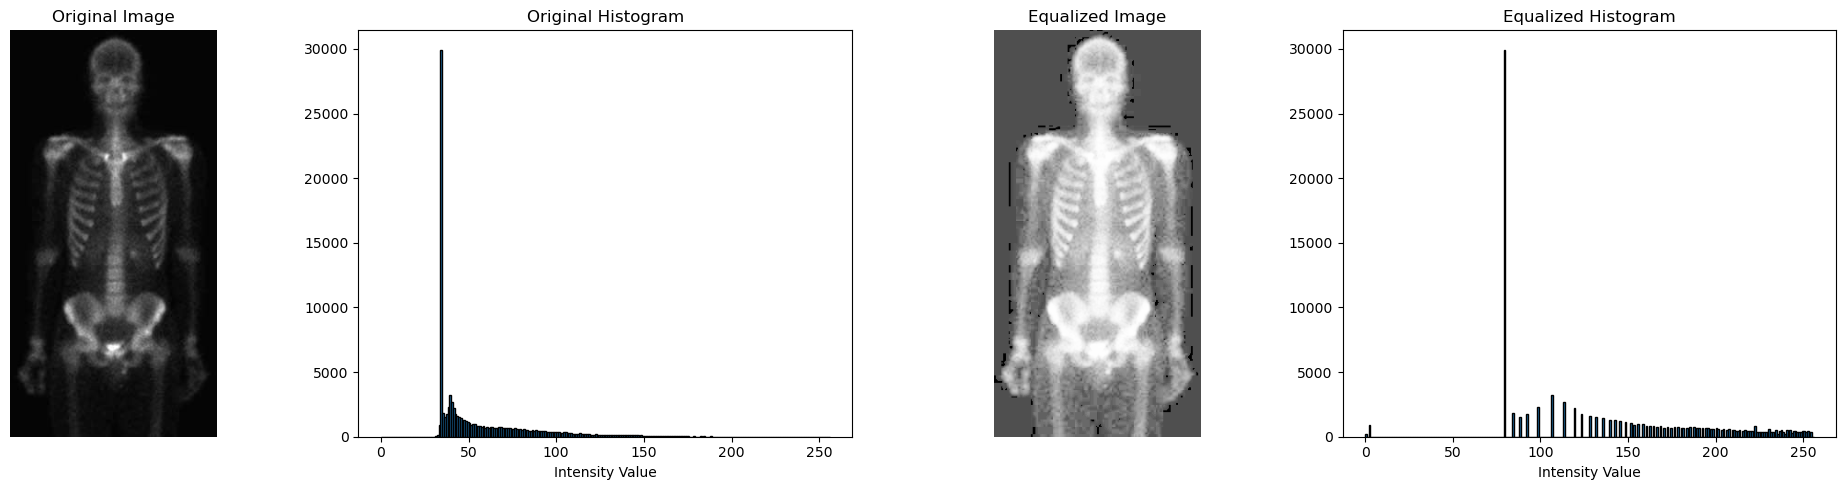

In [180]:
image = load_image("greyscale.jpg")  # Replace with your image filename
equalized_image = histogram_equalization(image)
plot_results(image, equalized_image)

## 2.2. Histogram Matching

**Histogram matching** is the process of transforming an image so that its histogram matches a specified histogram. To match the histogram of images A and B, we need to first equalize the histograms of both images. Then, we map each pixel of image A to image B using the equalized histograms and modify each pixel of A based on the values derived from B.

Histogram matching can be used to balance detector responses. It is particularly useful for equalizing two pictures taken in the same location under similar local lighting conditions (such as shadows) but with different sensors, atmospheric conditions, or global illumination.

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_image(filename):
    """Load an image and convert it to grayscale."""
    img = Image.open(filename).convert('L')  # Convert to grayscale
    return np.array(img)

def calculate_histogram(image):
    """Calculate the histogram of the image."""
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    return hist

def histogram_equalization(image):
    """Perform histogram equalization on the image."""
    hist = calculate_histogram(image)
    cdf = hist.cumsum()  # Cumulative distribution function
    cdf_mapped = np.floor(255 * (cdf - cdf.min()) / (cdf.max() - cdf.min())).astype(np.uint8)

    equalized_image = cdf_mapped[image]
    return equalized_image, cdf_mapped

def histogram_matching(image, target_cdf):
    """Match the histogram of an image to a target CDF."""
    equalized_image, source_cdf_mapped = histogram_equalization(image)

    mapping = np.zeros(256, dtype=np.uint8)
    for src_pixel in range(256):
        closest_pixel = np.argmin(np.abs(target_cdf - source_cdf_mapped[src_pixel]))
        mapping[src_pixel] = closest_pixel

    matched_image = mapping[image]
    return matched_image

def generate_target_histogram(option='uniform'):
    """Generate a target histogram CDF for matching."""
    if option == 'uniform':
        target_hist = np.ones(256)
    elif option == 'gaussian':
        x = np.arange(256)
        target_hist = np.exp(-0.5 * ((x - 128) / 40) ** 2)
    else:
        raise ValueError("Unknown option. Choose 'uniform' or 'gaussian'.")

    target_hist /= target_hist.sum()
    target_cdf = target_hist.cumsum()
    target_cdf_normalized = target_cdf / target_cdf[-1] * 255

    return target_cdf_normalized.astype(np.uint8)

def plot_results(original, matched, reference=None):
    """Plot original image, matched image, and histograms."""
    if reference is not None:
        fig, ax = plt.subplots(3, 2, figsize=(12, 15))
    else:
        fig, ax = plt.subplots(2, 2, figsize=(12, 10))

    ax[0, 0].imshow(original, cmap="gray")
    ax[0, 0].axis('off')
    ax[0, 0].set_title("Original Image")
    ax[0, 1].hist(original.ravel(), bins=256, range=[0, 256], color='black')
    ax[0, 1].set_title("Original Histogram")

    ax[1, 0].imshow(matched, cmap="gray")
    ax[1, 0].axis('off')
    ax[1, 0].set_title("Matched Image")
    ax[1, 1].hist(matched.ravel(), bins=256, range=[0, 256], color='black')
    ax[1, 1].set_title("Matched Histogram")

    if reference is not None:
        ax[2, 0].imshow(reference, cmap="gray")
        ax[2, 0].axis('off')
        ax[2, 0].set_title("Reference Image")
        ax[2, 1].hist(reference.ravel(), bins=256, range=[0, 256], color='black')
        ax[2, 1].set_title("Reference Histogram")

    plt.tight_layout()
    plt.show()

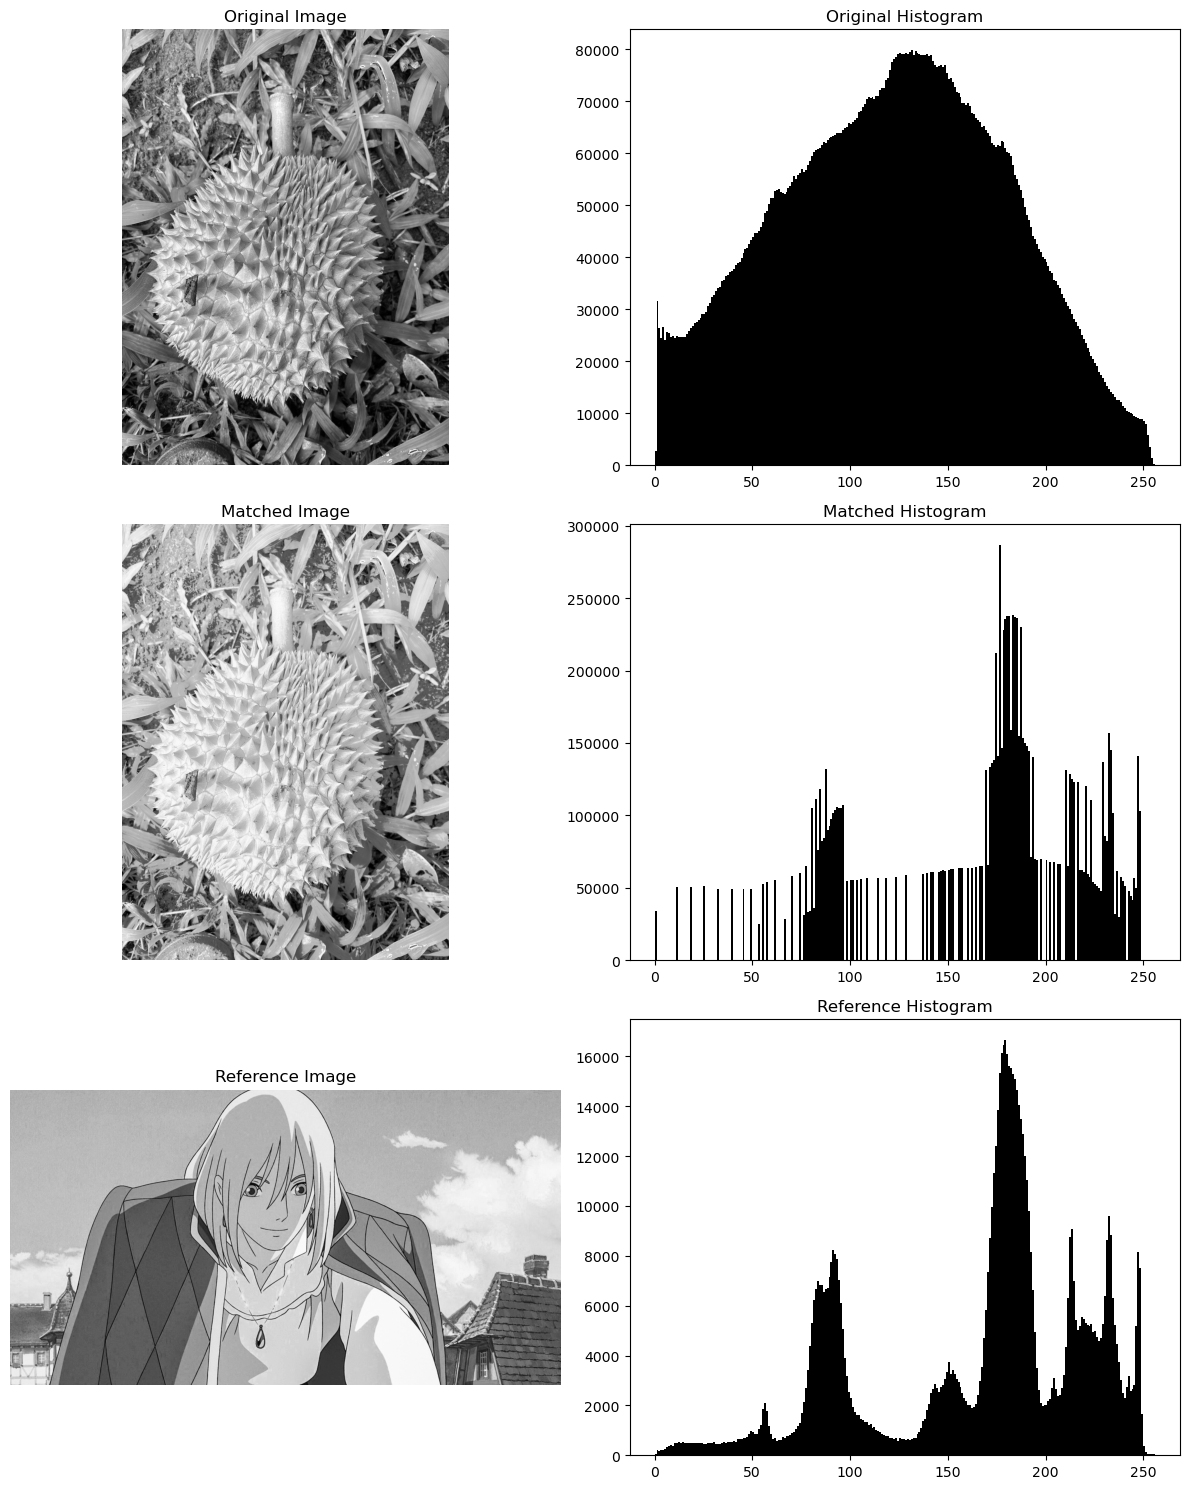

In [188]:
source_image = load_image("durian.jpg") 

# # Option 1: Using a synthetic target histogram (Uniform or Gaussian)
# target_cdf_uniform = generate_target_histogram(option='uniform')
# matched_image_uniform = histogram_matching(source_image, target_cdf_uniform)
# plot_results(source_image, matched_image_uniform)

# Option 2: Using a reference image
reference_image = load_image("original.jpg")
_, reference_cdf = histogram_equalization(reference_image)
matched_image_reference = histogram_matching(source_image, reference_cdf)
plot_results(source_image, matched_image_reference, reference_image)

# Image Enhancement Spatial Filtering (3)

Filtering is a technique for modifying or enhancing an image. Spatial domain operation or filtering (the processed value for the current pixel depends on both itself and surrounding pixels). Hence Filtering is a neighborhood operation, in which the value of any given pixel in the output image is determined by applying some algorithm to the values of the pixels in the neighborhood of the corresponding input pixel. A pixel's neighborhood is some set of pixels, defined by their locations relative to that pixel.

## 3.1. Smoothing Spatial Filters

Smoothing filter is used for blurring and noise reduction in the image. Blurring is pre-processing steps for removal of small details and Noise Reduction is accomplished by blurring.

### Linear Smoothing Filters (Average or Lowpass Filters)
The average filter is a uniform low pass filter. It is used to remove fine details and noise from the images.

The problem with average filter is that it blurred the edges when large neighborhoods are used to remove noise. The **Point Spread Function (PSF)** of average filter is “Sinc” in special domain which has negative side lobes causes ringing effects as well.

#### a. Mean Filter

**Description:** A basic averaging filter that computes the average of all pixel values in a defined neighborhood around the target pixel.

**Mathematical Formulation:**
$$
R(x,y) = \frac{1}{N} \sum_{(i,j) \in S} f(x+i,y+j)
$$
Where:
- $R(x,y)$ is the output pixel value,
- $f(x+i,y+j)$ are the pixel values in the neighborhood $S$,
- $N$ is the number of pixels in that neighborhood.

**Example:** For a $3 \times 3$ mean filter:

$$
\begin{bmatrix}
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\end{bmatrix}
$$

### Linear Filters Overview

**Definition:** Linear filters process an image by applying a linear combination of pixel values from the image and their neighbors, using a kernel (also known as a filter mask).

### A. Key Operations

#### **a. Convolution:**

- **Process:** A kernel is applied to each pixel by multiplying the kernel's weights by the corresponding pixel values in the image. The kernel is flipped (rotated by 180 degrees) before the operation.
- **Mathematical Representation:**
$$
g(x,y) = \sum_{i=-m}^{m} \sum_{j=-n}^{n} f(x+i,y+j) \cdot h(i,j)
$$
Where:
- $g$ is the output image,
- $f$ is the input image, and
- $h$ is the kernel.

- **Application:** Used in smoothing, sharpening, and edge detection filters.

#### **b. Correlation:**

- **Process:** Similar to convolution, but the kernel is not flipped. It measures the similarity between the kernel and the image.
- **Mathematical Representation:**
$$
g(x,y) = \sum_{i=-m}^{m} \sum_{j=-n}^{n} f(x+i,y+j) \cdot h(i,j)
$$
Where the kernel $h$ is not flipped.

- **Application:** Used in template matching and some linear filters.

### B. Linear Smoothing Filters

#### a. Mean Filter

**Description:** A basic averaging filter that computes the average of all pixel values in a defined neighborhood around the target pixel.

**Operation:** The mean filter operation is typically applied using **correlation**, where a kernel is slid over each pixel in the image, replacing the pixel value with the average of its neighborhood values. The kernel for a mean filter has equal weights, summing up to 1.

**Mathematical Formulation (Correlation):**
$$
R(x,y) = \frac{1}{N} \sum_{(i,j) \in S} f(x+i,y+j)
$$
Where:
- $R(x,y)$ is the output pixel value,
- $f(x+i,y+j)$ are the pixel values in the neighborhood $S$,
- $N$ is the number of pixels in that neighborhood.

**Example:** For a $3 \times 3$ mean filter (correlation kernel):

$$
\begin{bmatrix}
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\end{bmatrix}
$$

**Convolution Alternative:** The mean filter can also be implemented using **convolution** by flipping the kernel before applying it to the image. However, since the mean filter kernel is symmetric, flipping the kernel does not change the result, making convolution and correlation equivalent in this case.

#### b. Weighted Average Filter

**Description:** Similar to the mean filter, but assigns different weights to pixel values. This allows more emphasis on certain pixels (e.g., the center pixel), which helps in preserving important features, such as edges, during smoothing.

**Operation:** The weighted average filter is typically applied using **correlation**. A kernel with specific weights is slid over each pixel, where the output pixel is a weighted sum of its neighbors. This operation allows for different intensities in smoothing across the neighborhood.

**Mathematical Formulation (Correlation):**
$$
R(x,y) = \sum_{(i,j) \in S} w(i,j) f(x+i,y+j)
$$
Where:
- $w(i,j)$ is the weight for each pixel in the neighborhood $S$.

**Example:** For a $3 \times 3$ weighted filter (correlation kernel):

$$
\begin{bmatrix}
0 & 0.2 & 0 \\
0.2 & 0.4 & 0.2 \\
0 & 0.2 & 0 \\
\end{bmatrix}
$$

**Convolution Alternative:** Similar to the mean filter, the weighted filter can be applied with **convolution** by flipping the kernel before applying it. However, if the kernel is symmetric (e.g., Gaussian), the result is the same as with correlation. For asymmetric weighted filters, flipping the kernel during convolution will produce different results compared to correlation.
 kernel during convolution will produce different results compared to correlation.
 produce different results compared to correlation.


In [248]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

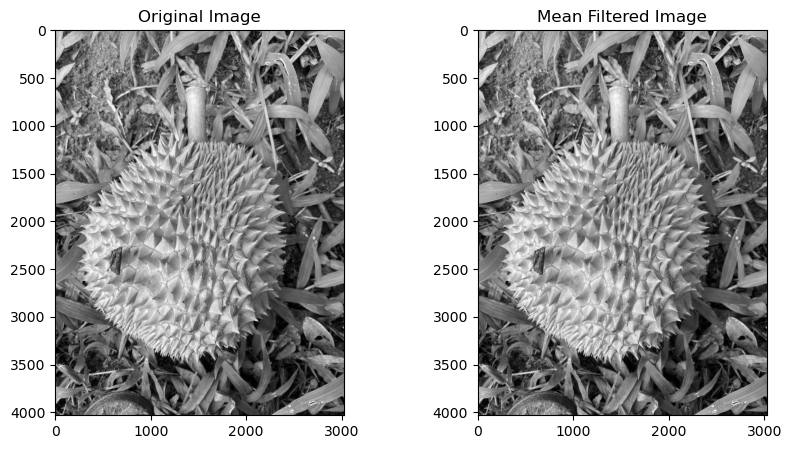

In [298]:
# Load an image
image = cv2.imread('durian.jpg', cv2.IMREAD_GRAYSCALE)

# Apply mean filter
mean_filter = np.ones((3, 3), np.float32) / 9
mean_filtered = cv2.filter2D(image, -1, mean_filter)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Mean Filtered Image')
plt.imshow(mean_filtered, cmap='gray')
plt.show()

#### b. Weighted Average Filter

**Description:** Similar to the mean filter, but assigns different weights to pixel values. This helps preserve more important features (like edges).

**Mathematical Formulation:**
$$
R(x,y) = \sum_{(i,j) \in S} w(i,j) f(x+i,y+j)
$$
Where:
- $w(i,j)$ is the weight for each pixel.

**Example:** For a $3 \times 3$ weighted filter:

$$
\begin{bmatrix}
0 & 0.2 & 0 \\
0.2 & 0.4 & 0.2 \\
0 & 0.2 & 0 \\
\end{bmatrix}
$$

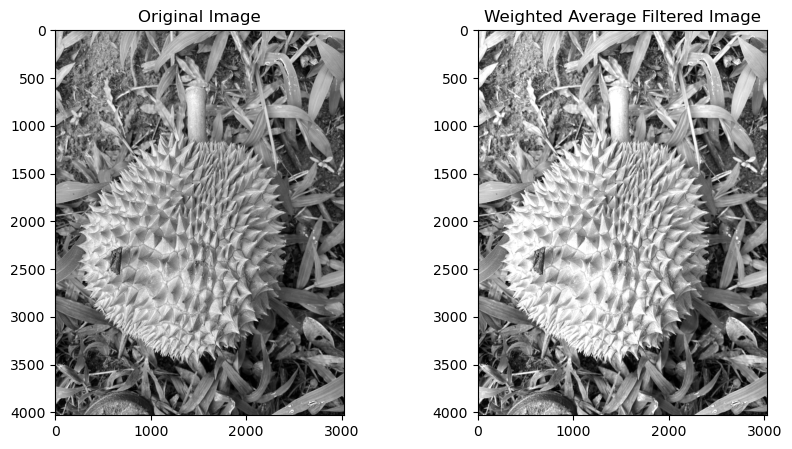

In [266]:
# Define a weighted average filter
weighted_filter = np.array([[0, 0.2, 0],
                             [0.2, 0.4, 0.2],
                             [0, 0.2, 0]])

weighted_filtered = cv2.filter2D(image, -1, weighted_filter)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Weighted Average Filtered Image')
plt.imshow(weighted_filtered, cmap='gray')
plt.show()

In [300]:
def convolve2d(image, kernel):
    """
    Perform 2D convolution using a kernel on an input image.
    
    :param image: Input image as a 2D numpy array
    :param kernel: Convolution kernel as a 2D numpy array
    :return: Convolved image as a 2D numpy array
    """
    # Get dimensions
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    # Calculate padding for the input image
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the image with zeros on all sides
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Create an empty output image
    output_image = np.zeros_like(image)

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Convolve the kernel over the region
            output_image[i, j] = np.sum(region * kernel)

    return output_image

In [304]:
image = cv2.imread('durian.jpg', cv2.IMREAD_GRAYSCALE)

# Apply the mean filter
mean_convolved_image = convolve2d(image, mean_filter)

# Apply the weighted average filter
weighted_convolved_image = convolve2d(image, weighted_filter)

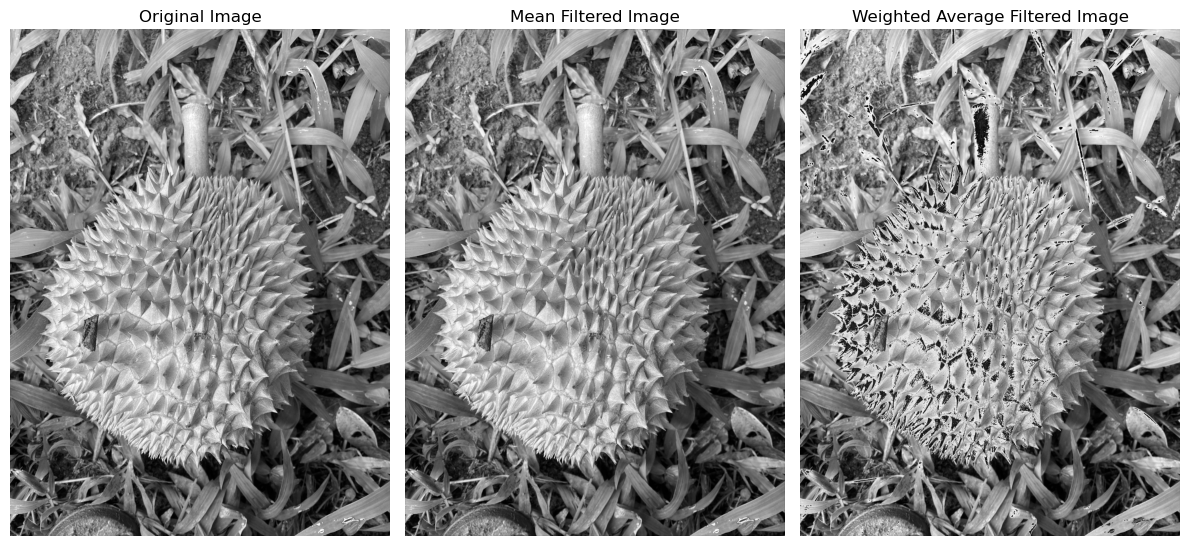

In [305]:
# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Mean Filtered Image')
plt.imshow(mean_convolved_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Weighted Average Filtered Image')
plt.imshow(weighted_convolved_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

#### c. Gaussian filter
The Gaussian filter is a non-uniform low pass filter. It is also used to remove fine details and noise from the images.

The Point Spread Function (PSF) of gaussian filter has positive side lobes which avoid ringing effects. The gaussian filter depend upon the value of standard deviation as larger values of standard deviation produce a wider peak (greater blurring).

In [345]:
import numpy as np

def gaussian_kernel(size, sigma=1):
    """Generate a Gaussian kernel."""
    kernel_range = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(kernel_range, kernel_range)
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)  # Normalize the kernel

def gaussian_filter_correlation(image, kernel):
    """
    Apply Gaussian filter using correlation.
    
    :param image: Input image as a 2D numpy array
    :param kernel: Gaussian filter kernel as a 2D numpy array
    :return: Filtered image as a 2D numpy array
    """
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    output_image = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Use the kernel directly for correlation
            output_image[i, j] = np.sum(region * kernel)

    return output_image

def gaussian_filter_convolution(image, kernel):
    """
    Apply Gaussian filter using convolution.
    
    :param image: Input image as a 2D numpy array
    :param kernel: Gaussian filter kernel as a 2D numpy array
    :return: Filtered image as a 2D numpy array
    """
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    output_image = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Flip the kernel for convolution
            output_image[i, j] = np.sum(region * np.flipud(np.fliplr(kernel)))

    return output_image

In [347]:
image = cv2.imread('durian.jpg', cv2.IMREAD_GRAYSCALE)

# Generate a Gaussian kernel
size = 5  # Size of the kernel (must be odd)
sigma = 1.0  # Standard deviation
gaussian_kernel = gaussian_kernel(size, sigma)
gaussian_correlated_image = gaussian_filter_correlation(image, gaussian_kernel)

In [ ]:
image = cv2.imread('durian.jpg', cv2.IMREAD_GRAYSCALE)

# Generate a Gaussian kernel
size = 5  # Size of the kernel (must be odd)
sigma = 1.0  # Standard deviation
gaussian_kernel = gaussian_kernel(size, sigma)
gaussian_convolved_image  = gaussian_filter_convolution(image, gaussian_kernel)

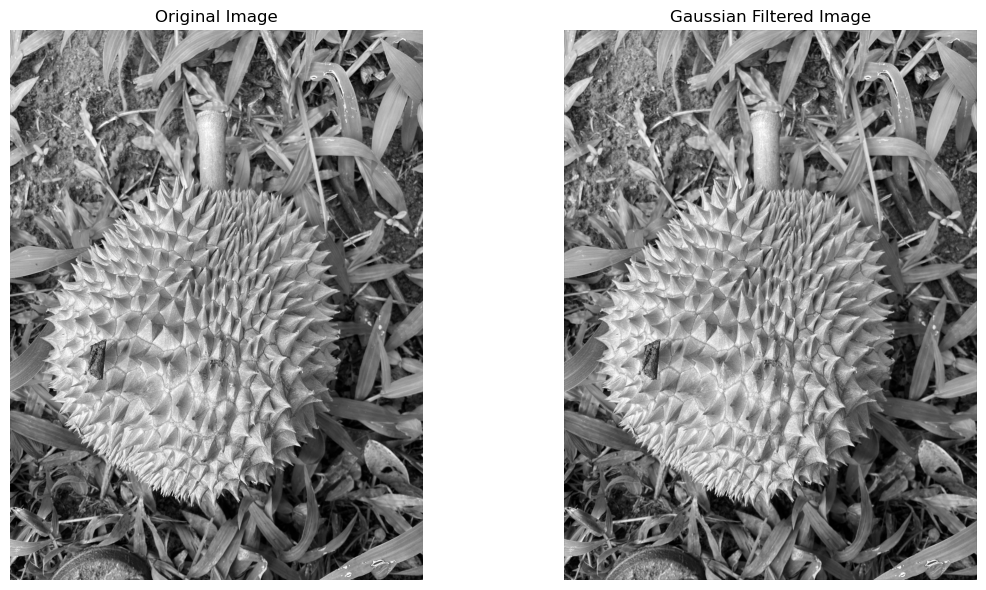

In [332]:
# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gaussian Filtered Image')
plt.imshow(gaussian_correlated_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gaussian Filtered Image')
plt.imshow(gaussian_convolved_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

### Non-Linear Smoothing Filters (Order-statistic Filters)
Order-statistic (nonlinear) filters work by processing pixels based on the ranks of their intensities within a specified neighborhood, rather than by calculating a straightforward average or weighted sum (like linear filters). This approach is particularly useful for removing noise in images, especially impulse or salt-and-pepper noise, without introducing significant blurring, which is often a side effect of linear filters.

#### a. Median Filter 
Replaces each pixel with the median of the pixel values in its neighborhood. It is particularly effective at removing salt-and-pepper noise.
$$
R(x,y) = \text{median}\left(f(x+i,y+j) \text{ for all } (i,j) \in N\right)
$$

#### b. Max and Min Filters

**Max Filter:** Returns the maximum value in the neighborhood.
$$
R(x,y) = \text{max}\left(f(x+i,y+j) \text{ for all } (i,j) \in N\right)
$$

**Min Filter:** Returns the minimum value in the neighborhood.
$$
R(x,y) = \text{min}\left(f(x+i,y+j) \text{ for all } (i,j) \in N\right)
$$

**Use Cases:** Max filters can be useful for identifying bright spots in an image, while min filters help locate dark spots.
filters help locate dark spots.


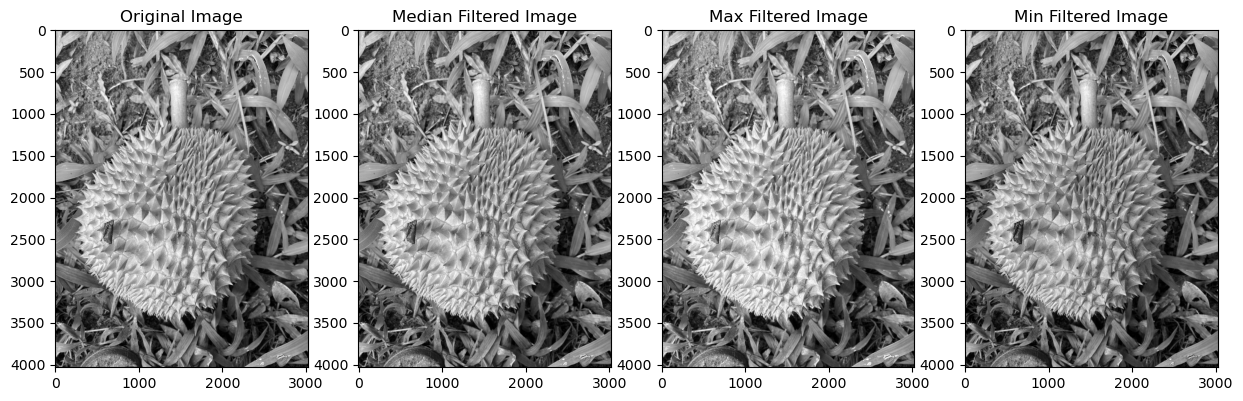

In [275]:
# Apply median filter
median_filtered = cv2.medianBlur(image, 3)

# Max filter
max_filtered = cv2.dilate(image, np.ones((3, 3)))

# Min filter
min_filtered = cv2.erode(image, np.ones((3, 3)))

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 4, 2)
plt.title('Median Filtered Image')
plt.imshow(median_filtered, cmap='gray')
plt.subplot(1, 4, 3)
plt.title('Max Filtered Image')
plt.imshow(max_filtered, cmap='gray')
plt.subplot(1, 4, 4)
plt.title('Min Filtered Image')
plt.imshow(min_filtered, cmap='gray')
plt.show()

## 3.2. Sharpening Filter
The primary goal of sharpening is to enhance the overall clarity and detail of an image. This often involves increasing the contrast at edges and enhancing fine details throughout the image.
Sharpening typically uses filters that enhance high-frequency components (edges and fine details) while preserving low-frequency information (smooth areas). The result is a clearer image with more defined edges.

### a. Unsharp Masking 
Enhances edges by subtracting a blurred version of the image from the original.

**Mathematical Representation:**
Sharpening can be represented by the formula:
$$
g(x,y) = f(x,y) + \alpha \cdot (f(x,y) - L(x,y))
$$
Where:
- $g(x,y)$ is the sharpened output image.
- $f(x,y)$ is the original image.
- $L(x,y)$ is a low-pass filtered version of the image (blurred).
- $\alpha$ is a scaling factor controlling the strength of sharpening.

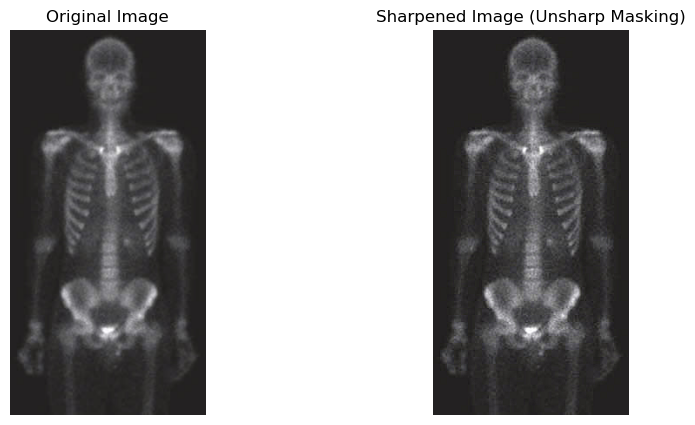

In [380]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def unsharp_mask(image, sigma=1.0, alpha=1.5):
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    # Create the unsharp mask
    sharpened = cv2.addWeighted(image, 1 + alpha, blurred, -alpha, 0)
    return sharpened

# Load image
image = cv2.imread('greyscale.jpg')
sharpened_image = unsharp_mask(image)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sharpened Image (Unsharp Masking)')
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

### a. Laplacian Filter 
Enhances edges by calculating the second derivative of the image intensity.First of all, Laplacian which is a derivative filter is used as a high pass filter so it highlights the edges and lines in an image but derivative filters are sensitive to noise so it will also amplify the noise. This filter is applied on noise free image as its sensitive to noise.


**Mathematical Representation:**
Sharpening can be represented by the formula:

$$
g(x,y) = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}
$$
Where:
- $g(x,y)$ is the output image with enhanced edges.
- $f(x,y)$ is the original image.


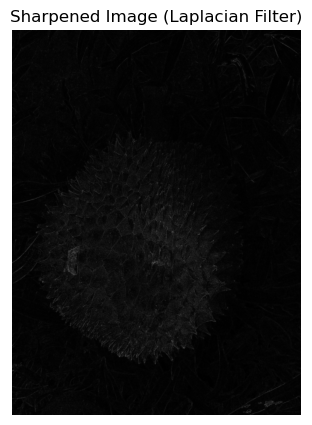

In [431]:
def laplacian_filter(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Laplacian filter
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
    # Normalize and convert back to uint8
    sharpened = cv2.convertScaleAbs(laplacian)
    return sharpened

# Load image
image = cv2.imread('durian.jpg')
sharpened_image = laplacian_filter(image)

# Display the results
plt.figure(figsize=(10, 5))
plt.title('Sharpened Image (Laplacian Filter)')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')
plt.show()


### c. High-Pass Filter 
The high-pass filter retains high-frequency components (edges) while attenuating low-frequency components (smooth areas).

**Mathematical Representation:**
$$
g(x,y) = f(x,y) - L(x,y)
$$
Where:
- $g(x,y)$ is the output image with enhanced edges.
- $f(x,y)$ is the original image.
- $L(x,y)$ is a low-pass filtered version of the image (e.g., using Gaussian blur).

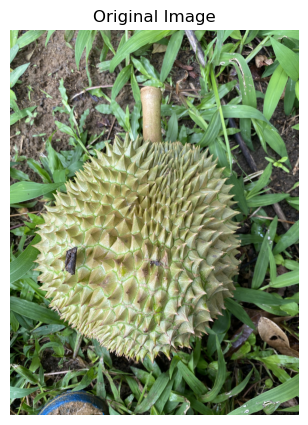

In [421]:
# Load image
image = cv2.imread('durian.jpg')

# Ensure the image was loaded
if image is None:
    raise ValueError("Image not found or unable to load.")

# Display the original image
plt.figure(figsize=(10, 5))
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


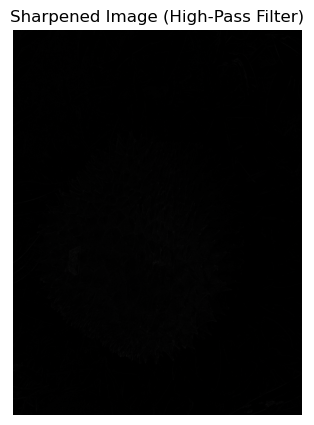

In [423]:
import cv2
import matplotlib.pyplot as plt

def high_pass_filter(image, sigma=1.0):
    # Apply Gaussian blur to get low-frequency components
    low_pass = cv2.GaussianBlur(image, (0, 0), sigma)
    # High-pass filter: subtract low-pass from original and clip values
    high_pass = cv2.subtract(image, low_pass)
    
    # Clip values to the range [0, 255] to avoid negative values
    high_pass = np.clip(high_pass, 0, 255)
    
    return high_pass.astype('uint8')


# Load image
image = cv2.imread('durian.jpg')

# Ensure the image was loaded
if image is None:
    raise ValueError("Image not found or unable to load.")

# Apply high-pass filter
sharpened_image = high_pass_filter(image)

# Display the results
plt.figure(figsize=(10, 5))
plt.title('Sharpened Image (High-Pass Filter)')
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


## 3.3. Edge Detection Filter
The primary goal of edge detection is to identify and locate sharp discontinuities in an image, which correspond to object boundaries or changes in surface orientation. Edge detection algorithms focus specifically on finding pixels where there is a significant change in intensity, thus marking edges in the image. This is often done by computing gradients or using second-derivative operators.

### a. Sobel Operator
Computes the gradient of the image intensity in both the x and y directions.

**Mathematical Representation:**
Edge detection is often represented by the gradient magnitude:

$$
G_x = \frac{\partial f}{\partial x} \quad \text{and} \quad G_y = \frac{\partial f}{\partial y}
$$
Where:
- $G_x$ and $G_y$ are the gradients in the x and y directions.
- $f(x,y)$ is the original image.

The magnitude of the gradient can be computed as:
$$
G = \sqrt{G_x^2 + G_y^2}
$$

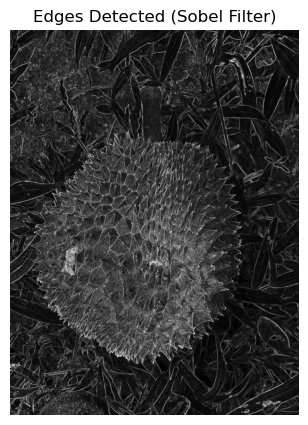

In [395]:
def sobel_filter(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Sobel filter in x and y directions
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    # Compute the gradient magnitude
    sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)
    # Normalize and convert back to uint8
    sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)
    return sobel_magnitude

# Load image
image = cv2.imread('durian.jpg')
edges = sobel_filter(image)

# Display the results
plt.figure(figsize=(10, 5))
plt.title('Edges Detected (Sobel Filter)')
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


### b. Canny Edge Detection
 
Canny edge detection is a multi-stage algorithm that detects edges by first smoothing the image, finding gradients, and then applying non-maximum suppression and hysteresis thresholding.

The process involves:
1. Smoothing the image using a Gaussian filter.
2. Finding intensity gradients.
3. Applying non-maximum suppression.
4. Performing double thresholding to identify strong and weak edges.
5. Edge tracking by hysteresis.

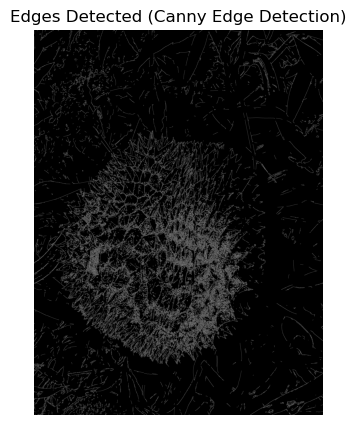

In [399]:
def canny_edge_detection(image, low_threshold=100, high_threshold=200):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, low_threshold, high_threshold)
    return edges

# Load image
image = cv2.imread('durian.jpg')
edges = canny_edge_detection(image)

# Display the results
plt.figure(figsize=(10, 5))
plt.title('Edges Detected (Canny Edge Detection)')
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


### c. Prewitt Filter

**Purpose:**  
The Prewitt filter is used to detect edges by computing the gradient in the x and y directions using convolution with specific kernels.

**Mathematical Representation:**
The Prewitt operator uses the following kernels for gradient calculation:
$$
G_x = \begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1 \\
\end{bmatrix}, \quad
G_y = \begin{bmatrix}
1 & 1 & 1 \\
0 & 0 & 0 \\
-1 & -1 & -1 \\
\end{bmatrix}
$$
Where:
- $G_x$ and $G_y$ are the gradients in the x and y directions.

The gradient magnitude is computed similarly:
$$
G = \sqrt{G_x^2 + G_y^2}
$$

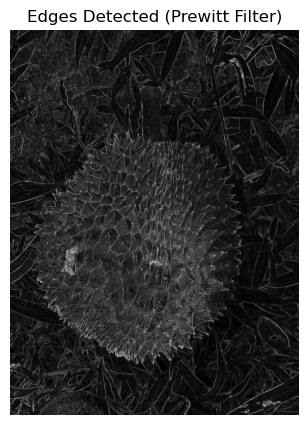

In [401]:
def prewitt_filter(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Define Prewitt kernels
    kernel_x = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]])
    
    kernel_y = np.array([[1, 1, 1],
                         [0, 0, 0],
                         [-1, -1, -1]])
    
    # Apply convolution with Prewitt kernels
    prewitt_x = cv2.filter2D(gray_image, cv2.CV_64F, kernel_x)
    prewitt_y = cv2.filter2D(gray_image, cv2.CV_64F, kernel_y)
    
    # Compute the gradient magnitude
    prewitt_magnitude = cv2.magnitude(prewitt_x, prewitt_y)
    # Normalize and convert back to uint8
    prewitt_magnitude = cv2.convertScaleAbs(prewitt_magnitude)
    return prewitt_magnitude

# Load image
image = cv2.imread('durian.jpg')
edges = prewitt_filter(image)

# Display the results
plt.figure(figsize=(10, 5))
plt.title('Edges Detected (Prewitt Filter)')
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()
